<h1>FEATURE SELECTION AND ENGINEERING</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.feature_selection import chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

<h3>Importing Data</h3>

In [3]:
# Loading the dataset into the notebook
data = pd.read_csv('../data/Loan_Data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<h3>Treatment of Outliers</h3>

In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data.shape

(614, 13)

In [7]:
# Identifying outliers as those which are 1.5 times the interquartile range and removing them

def remove_outliers(data, col):
    newdata = data[col].dropna()
    q25, q75 = np.percentile(newdata,25), np.percentile(newdata,75)
    iqr = q75 - q25
    limit = iqr*1.5

    lwr, upr = q25-limit, q75+limit
    print(lwr)
    print(upr)
    return data[col].clip(lower=lwr, upper=upr)


In [8]:
data['ApplicantIncome']=remove_outliers(data, 'ApplicantIncome')
data['CoapplicantIncome'] = remove_outliers(data, 'CoapplicantIncome')
data['LoanAmount'] = remove_outliers(data, 'LoanAmount')

-1498.75
10171.25
-3445.875
5743.125
-2.0
270.0


array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

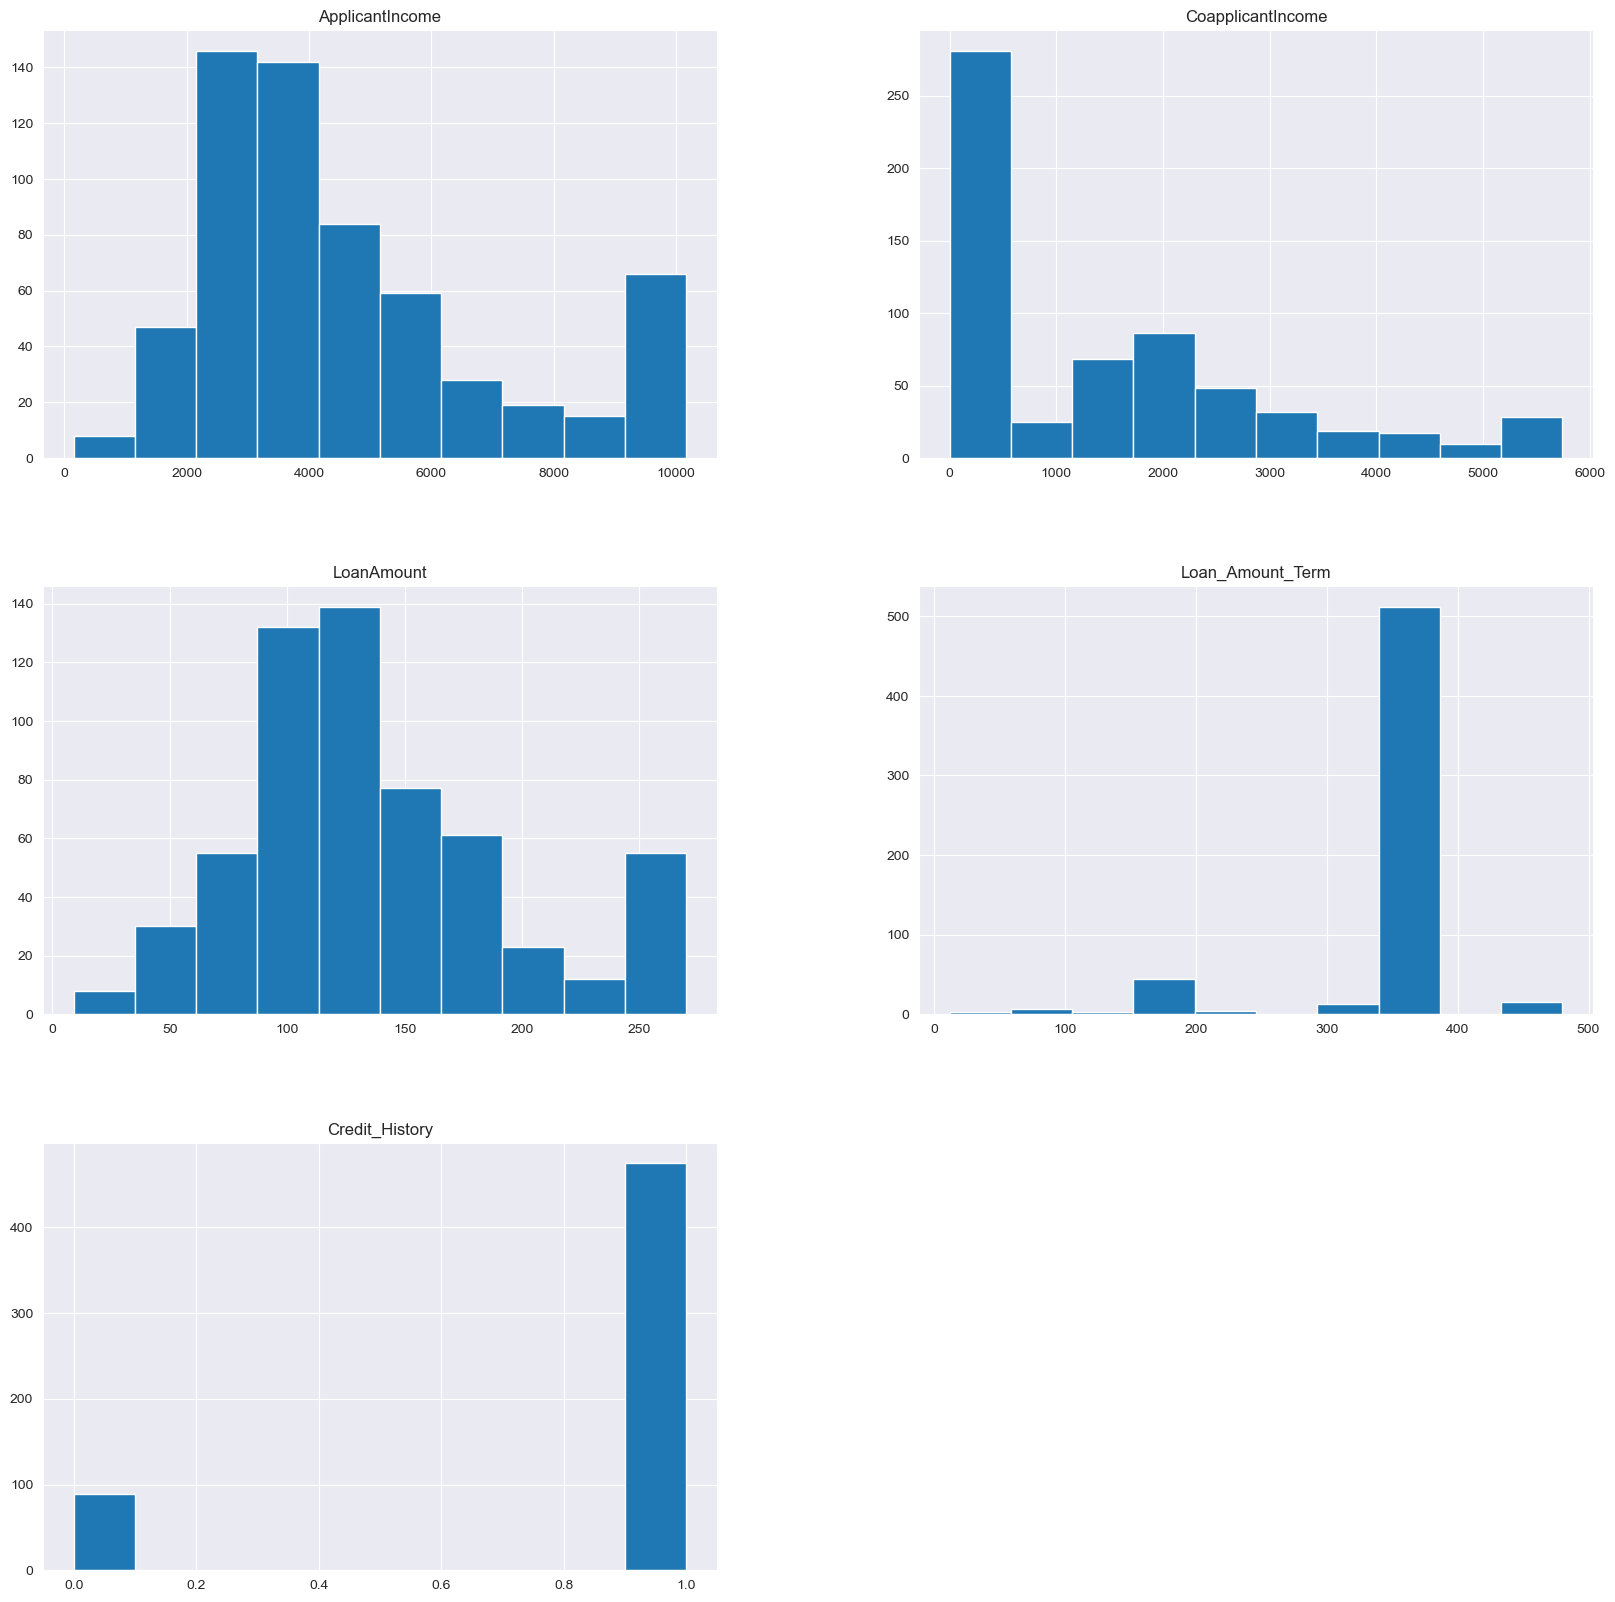

In [9]:
data.hist(figsize=(20,20))

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


<h3>MISSING VALUES</h3>

Male      489
Female    112
Name: Gender, dtype: int64


C:\Users\ituser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

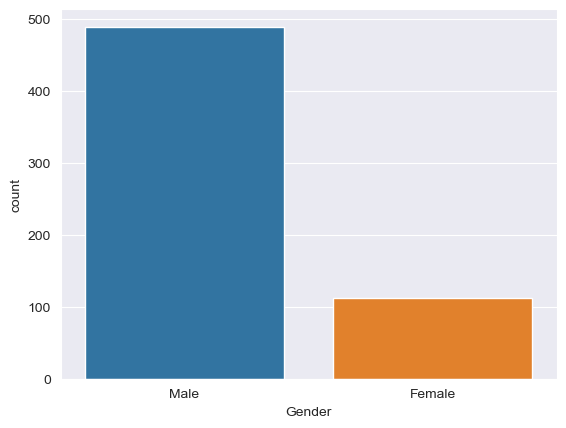

In [11]:
# A quick observation of Gender values
print(data['Gender'].value_counts())
sns.countplot(data['Gender'])

489 records out of 601 are all Male gender. That is 81%.

In [12]:
data[data['Gender'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365.00,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,10171.25,0.0,270.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,10171.25,0.0,270.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674.00,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473.00,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833.00,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083.00,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,10171.25,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873.00,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583.00,0.0,96.0,360.0,1.0,Urban,N


There is a lot of valuable data for the 13 records that have missing values at Gender though the records are only 13. It would be reasonable to just assume they are all male. Any mistake shouldn't have much impact on the final product. Afterall, Gender is not highly correlated to the target variable Loan_Status with a correlation coefficient of 0.015.

In [13]:
data['Gender'].fillna('Male', inplace=True)

Married only has 3 missing values.

In [14]:
data[data['Married'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816.0,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758.0,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047.0,0.0,NaN,240.0,1.0,Semiurban,Y


C:\Users\ituser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

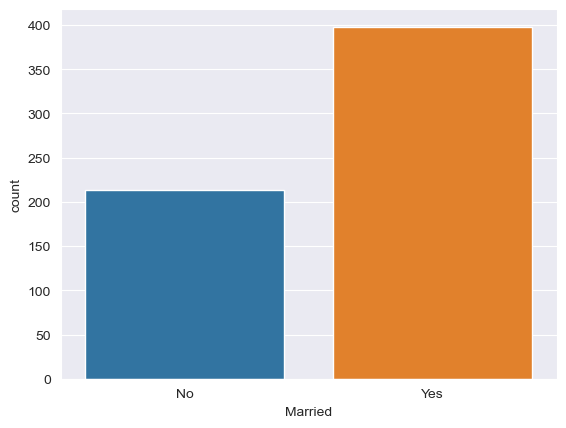

In [15]:
sns.countplot(data['Married'])

It appears most applicants are married. Again, it shouldn't hurt to fill these missing values with the mode (Yes).

In [16]:
data['Married'].fillna('Yes', inplace=True)

C:\Users\ituser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

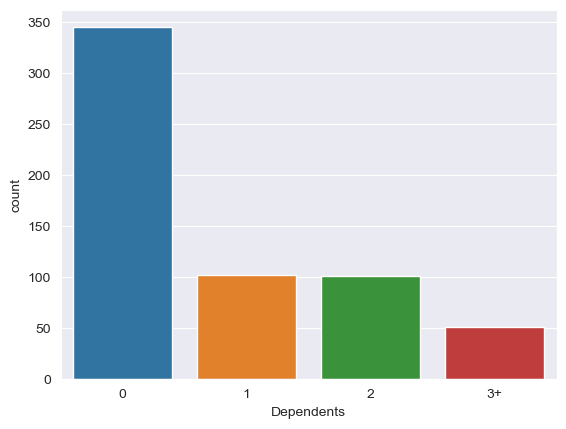

In [17]:
sns.countplot(data['Dependents'])

In [20]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Most records are of people with no dependents and there are only 15 records missing. We shall fill the missing records with 0.

In [21]:
data['Dependents'].fillna(0, inplace=True)

In [23]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Only 32 missing values and most are no. We replace values with the mode of 'NO'

In [24]:
data['Self_Employed'].fillna('No', inplace=True)

In [26]:
data['LoanAmount'].describe()

count    592.000000
mean     138.288851
std       58.059973
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      270.000000
Name: LoanAmount, dtype: float64

Loan Amount is a continuous variable and only 22 records are missing. These will be replaced by the mean.

In [28]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

C:\Users\ituser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

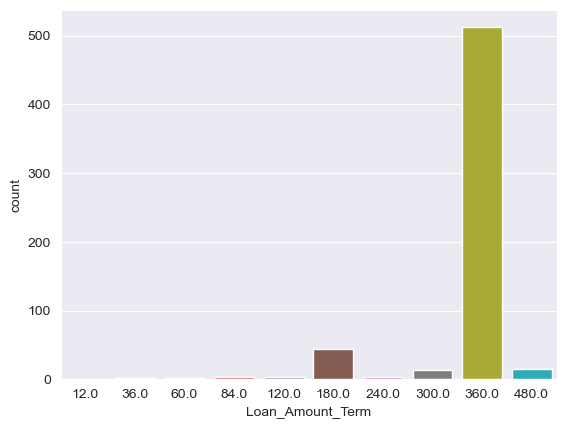

In [29]:
sns.countplot(data['Loan_Amount_Term'])

In [30]:
data['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [31]:
data['Loan_Amount_Term'].var()

4240.667779632721

In [32]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Loan Amount Term seems like a continuous variable at first, but with a closer look, it is likely that it is actually a categorical variable. In addition, only 14 records are missing, so filling missing values with the mode should be appropriate.

In [33]:
data['Loan_Amount_Term'].fillna(360, inplace=True)

In [34]:
data['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

The only feature left with missing values is Credit_History. This is a categorical feature. There are 50 missing values and it has the highest correlation with the target variable of 56%.

In [36]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [37]:
data['Credit_History'].isna().sum()

50

In [38]:
50/614

0.08143322475570032

8.1% of records have a missing credit history. In the interest of preserving the integrity of the data, the records will be deleted. We may come back to choose a different solution as the project progresses if the need arises.

In [39]:
df = data[data['Credit_History'].isna()==False]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   Gender             564 non-null    object 
 2   Married            564 non-null    object 
 3   Dependents         564 non-null    object 
 4   Education          564 non-null    object 
 5   Self_Employed      564 non-null    object 
 6   ApplicantIncome    564 non-null    float64
 7   CoapplicantIncome  564 non-null    float64
 8   LoanAmount         564 non-null    float64
 9   Loan_Amount_Term   564 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      564 non-null    object 
 12  Loan_Status        564 non-null    object 
dtypes: float64(5), object(8)
memory usage: 61.7+ KB


<h3>TURNING FEATURES TO NUMERIC VALUES</h3>

In [41]:
# Converting objects into numeric variables
df['Gender'].replace({'Female':0, 'Male':1}, inplace=True)
df['Loan_Status'].replace({'N':0, 'Y':1}, inplace=True)
df['Married'].replace({'No':0, 'Yes':1}, inplace=True)
df['Dependents'].replace({'3+':3}, inplace=True)
df['Self_Employed'].replace({'No':0, 'Yes':1}, inplace=True)
df['Education'].replace({'Not Graduate':0, 'Graduate':1}, inplace=True)
df['Property_Area'].replace({'Urban':2, 'Rural':0, 'Semiurban':1}, inplace=True)
df = df.astype({'Dependents':'float'})

C:\Users\ituser\anaconda3\lib\site-packages\pandas\core\generic.py:6610: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   Gender             564 non-null    int64  
 2   Married            564 non-null    int64  
 3   Dependents         564 non-null    float64
 4   Education          564 non-null    int64  
 5   Self_Employed      564 non-null    int64  
 6   ApplicantIncome    564 non-null    float64
 7   CoapplicantIncome  564 non-null    float64
 8   LoanAmount         564 non-null    float64
 9   Loan_Amount_Term   564 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      564 non-null    int64  
 12  Loan_Status        564 non-null    int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 61.7+ KB


In [43]:
# The Loan ID feature is being removed because it is not needed
df.drop('Loan_ID', axis=1, inplace=True)

<h3>FEATURE ENGINEERING</h3>

In [44]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1,0,5849.0,0.0,138.288851,360.0,1.0,2,1
1,1,1,1.0,1,0,4583.0,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,1,1,3000.0,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,0,0,2583.0,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,1,0,6000.0,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,1,0,2900.0,0.0,71.000000,360.0,1.0,0,1
610,1,1,3.0,1,0,4106.0,0.0,40.000000,180.0,1.0,0,1
611,1,1,1.0,1,0,8072.0,240.0,253.000000,360.0,1.0,2,1
612,1,1,2.0,1,0,7583.0,0.0,187.000000,360.0,1.0,2,1


In [45]:
# Adding feature for Graduated Married Males
df["graduatedMarriedMale"] =  (df.loc[:,'Gender'] + df.loc[:, 'Married'] + df.loc[:, 'Education'] == 3).astype('int64')

In [50]:
df.corr('kendall')['Loan_Status']

Gender                 -0.548140
Married                -0.512792
Dependents             -0.567678
Education              -0.519431
Self_Employed          -0.600884
ApplicantIncome        -0.563143
CoapplicantIncome      -0.546490
LoanAmount             -0.576408
Loan_Amount_Term       -0.549564
Credit_History         -0.396647
Property_Area          -0.557021
Loan_Status             1.000000
graduatedMarriedMale   -0.462114
Name: Loan_Status, dtype: float64

<h5>Do Graduated Married Males have positive impact on Loan Status compared to Non-Graduated Married Males?</h5>

In [52]:
frame = df[['graduatedMarriedMale', 'Loan_Status']]

In [53]:
frame

,graduatedMarriedMale,Loan_Status
0,0,1
1,1,0
2,1,1
3,0,1
4,0,1
...,...,...
609,0,1
610,1,1
611,1,1
612,1,1


In [54]:
chi2(frame[['graduatedMarriedMale']], frame['Loan_Status'])

(array([5.80517343]), array([0.01597909]))

According to the chi2 test above, the p-value is less than 5% which means the two features are dependent. This means being a graduated married male has a significant impact on Loan Status.

<h5>Does having CoapplicantIncome increase the Loan Approval Percentage?</h5>

In [55]:
df['Loan_Status'].count()

564

In [53]:
df['Loan_Status'].sum()/df['Loan_Status'].count()

0.6826241134751773

In [54]:
#df['Loan_Approval_Percentage'] = df['Loan_Status'].sum()/df['Loan_Status'].count()

As seen in the EDA notebook, the pearson coefficient for CoapplicantIncome and Loan_Status is about 0.06. This is very low. There is hardly any correlation between the two features. So CoapplicantIncome does not have any impact on Loan Approval Percentage.

<h5>Loan Approval Percentage of users who request for Loan Amount greater than 200 per property area.</h5>

In [55]:
df[df['LoanAmount']>200].groupby('Property_Area').agg(np.mean)['Loan_Status']

Property_Area
0    0.450000
1    0.709677
2    0.650000
Name: Loan_Status, dtype: float64

<h5>Creating the new composite features</h5>

In [56]:
df['GME'] = df['Gender']+df['Married']+df['Education']

In [57]:
df['selfemp_Proparea'] = df['Self_Employed']+df['Property_Area']

In [58]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,graduatedMarriedMale,GME,selfemp_Proparea
0,LP001002,1,0,0.0,1,0,5849.0,0.0,138.288851,360.0,1.0,2,1,0,2,2
1,LP001003,1,1,1.0,1,0,4583.0,1508.0,128.000000,360.0,1.0,0,0,1,3,0
2,LP001005,1,1,0.0,1,1,3000.0,0.0,66.000000,360.0,1.0,2,1,1,3,3
3,LP001006,1,1,0.0,0,0,2583.0,2358.0,120.000000,360.0,1.0,2,1,0,2,2
4,LP001008,1,0,0.0,1,0,6000.0,0.0,141.000000,360.0,1.0,2,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0.0,1,0,2900.0,0.0,71.000000,360.0,1.0,0,1,0,1,0
610,LP002979,1,1,3.0,1,0,4106.0,0.0,40.000000,180.0,1.0,0,1,1,3,0
611,LP002983,1,1,1.0,1,0,8072.0,240.0,253.000000,360.0,1.0,2,1,1,3,2
612,LP002984,1,1,2.0,1,0,7583.0,0.0,187.000000,360.0,1.0,2,1,1,3,2


<h5>Encoding categorical variables using target encoding</h5>

In [59]:
# Breaking data into training and test sets
def splitData(data):
    X = data.drop('Loan_Status',axis=1)
    y = data[['Loan_Status']]
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    print((x_train.shape, x_test.shape), (y_train.shape,y_test.shape))
    return [x_train, x_test, y_train, y_test]

In [60]:
def targetEncode(x_train, x_test, y_train, vars):
    list = []
    for i in vars:
        values = x_train[i].unique()
        x_train[i+'_Encoded'] = x_train[i]
        x_test[i+'_Encoded'] = x_test[i]
        print(x_train)
        for j in values:
            avg = y_train[x_train[i] == j]['Loan_Status'].mean()
            x_train[i+'_Encoded'].replace({j:avg}, inplace = True)
            x_test[i+'_Encoded'].replace({j:avg}, inplace = True)

    return [x_train, x_test]

In [61]:
x_train, x_test, y_train, y_test = splitData(df)

((451, 15), (113, 15)) ((451, 1), (113, 1))


In [63]:
x_train, x_test = targetEncode(x_train, x_test, y_train, ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'graduatedMarriedMale', 'GME', 'selfemp_Proparea'])

      Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
359  LP002160       1        1         3.0          1              0   
127  LP001449       1        0         0.0          1              0   
228  LP001760       1        1         0.0          1              0   
0    LP001002       1        0         0.0          1              0   
482  LP002537       1        1         0.0          1              0   
..        ...     ...      ...         ...        ...            ...   
75   LP001255       1        0         0.0          1              0   
114  LP001398       1        0         0.0          1              0   
292  LP001940       1        1         2.0          1              0   
472  LP002519       1        1         3.0          1              0   
110  LP001385       1        0         0.0          1              0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
359           5167.0             3167.0  200.000000           

In [64]:
x_train.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'graduatedMarriedMale', 'GME', 'selfemp_Proparea'], axis=1, inplace=True)

In [65]:
x_train

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Encoded,Married_Encoded,Dependents_Encoded,Education_Encoded,Self_Employed_Encoded,Credit_History_Encoded,Property_Area_Encoded,graduatedMarriedMale_Encoded,GME_Encoded,selfemp_Proparea_Encoded
359,LP002160,5167.0,3167.0,200.000000,360.0,0.7,0.728873,0.694444,0.71875,0.688312,0.794271,0.761364,0.782609,0.782609,0.738636
127,LP001449,3865.0,1640.0,138.288851,360.0,0.7,0.622754,0.683824,0.71875,0.688312,0.794271,0.615942,0.610656,0.607843,0.610619
228,LP001760,4758.0,0.0,158.000000,480.0,0.7,0.728873,0.683824,0.71875,0.688312,0.794271,0.761364,0.782609,0.782609,0.738636
0,LP001002,5849.0,0.0,138.288851,360.0,0.7,0.622754,0.683824,0.71875,0.688312,0.794271,0.671533,0.610656,0.607843,0.698630
482,LP002537,2083.0,3150.0,128.000000,360.0,0.7,0.728873,0.683824,0.71875,0.688312,0.794271,0.761364,0.782609,0.782609,0.738636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,LP001255,3750.0,0.0,113.000000,480.0,0.7,0.622754,0.683824,0.71875,0.688312,0.794271,0.671533,0.610656,0.607843,0.698630
114,LP001398,5050.0,0.0,118.000000,360.0,0.7,0.622754,0.683824,0.71875,0.688312,0.794271,0.761364,0.610656,0.607843,0.738636
292,LP001940,3153.0,1560.0,134.000000,360.0,0.7,0.728873,0.746667,0.71875,0.688312,0.794271,0.671533,0.782609,0.782609,0.698630
472,LP002519,4691.0,0.0,100.000000,360.0,0.7,0.728873,0.694444,0.71875,0.688312,0.794271,0.761364,0.782609,0.782609,0.738636


In [66]:
x_test.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'graduatedMarriedMale', 'GME', 'selfemp_Proparea'], axis=1, inplace=True)

In [67]:
x_test

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Encoded,Married_Encoded,Dependents_Encoded,Education_Encoded,Self_Employed_Encoded,Credit_History_Encoded,Property_Area_Encoded,graduatedMarriedMale_Encoded,GME_Encoded,selfemp_Proparea_Encoded
586,LP002916,2297.0,1522.000,104.0,360.0,0.700000,0.728873,0.683824,0.718750,0.688312,0.794271,0.671533,0.782609,0.782609,0.698630
570,LP002842,3417.0,1750.000,186.0,360.0,0.700000,0.728873,0.647059,0.718750,0.688312,0.794271,0.671533,0.782609,0.782609,0.698630
253,LP001843,2661.0,5743.125,270.0,180.0,0.700000,0.728873,0.647059,0.585859,0.688312,0.794271,0.761364,0.610656,0.607843,0.738636
571,LP002847,5116.0,1451.000,165.0,360.0,0.700000,0.728873,0.683824,0.718750,0.688312,0.089552,0.671533,0.782609,0.782609,0.698630
528,LP002714,2679.0,1302.000,94.0,360.0,0.700000,0.622754,0.647059,0.585859,0.688312,0.794271,0.761364,0.610656,0.594937,0.738636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,LP001699,2479.0,0.000,59.0,360.0,0.700000,0.622754,0.683824,0.718750,0.688312,0.794271,0.671533,0.610656,0.607843,0.698630
96,LP001327,2484.0,2302.000,137.0,360.0,0.641975,0.728873,0.683824,0.718750,0.688312,0.794271,0.761364,0.610656,0.607843,0.738636
569,LP002841,3166.0,2064.000,104.0,360.0,0.700000,0.728873,0.683824,0.718750,0.688312,0.089552,0.671533,0.782609,0.782609,0.698630
402,LP002297,2500.0,5743.125,103.0,360.0,0.700000,0.622754,0.683824,0.718750,0.688312,0.794271,0.761364,0.610656,0.607843,0.738636


<h3>Feature Selection</h3>

<h5>Using Recursive Feature Elimination (RFE)</h5>

In [68]:
rfe = RFE(LogisticRegression())

In [69]:
X = x_train.drop(['Loan_ID'], axis=1)
y = y_train
rfe.fit(X, y)

C:\Users\ituser\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ituser\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ituser\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ituser\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the num

RFE(estimator=LogisticRegression())

In [81]:
# The list of selected features
selected_features = rfe.get_feature_names_out()
selected_features

array(['Married_Encoded', 'Education_Encoded', 'Credit_History_Encoded',
       'Property_Area_Encoded', 'graduatedMarriedMale_Encoded',
       'GME_Encoded', 'selfemp_Proparea_Encoded'], dtype=object)

In [72]:
final_train = x_train[selected_features]

In [73]:
final_test = x_test[selected_features]

In [74]:
final_train['Loan_Status'] = y_train

C:\Users\ituser\anaconda3\lib\site-packages\pandas\core\frame.py:3599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item_frame_value(key, value)


In [75]:
final_test['Loan_Status'] = y_test

C:\Users\ituser\anaconda3\lib\site-packages\pandas\core\frame.py:3599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item_frame_value(key, value)


In [76]:
final_train.corr()

,Married_Encoded,Education_Encoded,Credit_History_Encoded,Property_Area_Encoded,graduatedMarriedMale_Encoded,GME_Encoded,selfemp_Proparea_Encoded,Loan_Status
Married_Encoded,1.000000,0.014882,0.002462,-0.001829,0.706300,0.666851,0.069236,0.110756
Education_Encoded,0.014882,1.000000,0.094781,0.081547,0.488468,0.408089,0.101755,0.118889
Credit_History_Encoded,0.002462,0.094781,1.000000,0.013274,0.109492,0.127069,-0.007706,0.541720
Property_Area_Encoded,-0.001829,0.081547,0.013274,1.000000,0.006825,0.009216,0.777518,0.132693
graduatedMarriedMale_Encoded,0.706300,0.488468,0.109492,0.006825,1.000000,0.963757,0.063302,0.185202
GME_Encoded,0.666851,0.408089,0.127069,0.009216,0.963757,1.000000,0.049741,0.192167
selfemp_Proparea_Encoded,0.069236,0.101755,-0.007706,0.777518,0.063302,0.049741,1.000000,0.111803
Loan_Status,0.110756,0.118889,0.541720,0.132693,0.185202,0.192167,0.111803,1.000000


Some of the features in the dataset are too highly correlated and some dimensionality reduction technique may be necessary to resolve the issue.

In [78]:
final_train.to_csv('../Data/selected_data.csv')

In [80]:
final_test.to_csv('../Data/test_data.csv')